In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
!ls

gdrive	sample_data


**Ioading data**


In [0]:
!ls

gdrive	sample_data


In [0]:
!wget http://cs231n.stanford.edu/tiny-imagenet-200.zip

--2019-04-04 14:41:29--  http://cs231n.stanford.edu/tiny-imagenet-200.zip
Resolving cs231n.stanford.edu (cs231n.stanford.edu)... 171.64.68.10
Connecting to cs231n.stanford.edu (cs231n.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248100043 (237M) [application/zip]
Saving to: ‘tiny-imagenet-200.zip’

tiny-imagenet-200.z 100%[===================>] 236.61M  20.8MB/s    in 15s     

2019-04-04 14:41:44 (16.3 MB/s) - ‘tiny-imagenet-200.zip’ saved [248100043/248100043]



In [0]:
!unzip -qq 'tiny-imagenet-200.zip'
!ls

gdrive	sample_data  tiny-imagenet-200	tiny-imagenet-200.zip


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

import keras

Using TensorFlow backend.


In [0]:
# load the val annotations file

import os

def get_annotations_map():
	valAnnotationsPath = './tiny-imagenet-200/val/val_annotations.txt'
	valAnnotationsFile = open(valAnnotationsPath, 'r')
	valAnnotationsContents = valAnnotationsFile.read()
	valAnnotations = {}

	for line in valAnnotationsContents.splitlines():
		pieces = line.strip().split()
		valAnnotations[pieces[0]] = pieces[1]

	return valAnnotations

Loading 2 classes
loading training images...
finished loading training images
loading test images...
finished loading test images100
0
0
1
1


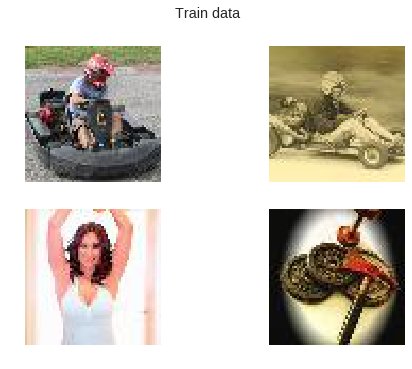

1
0
1
0


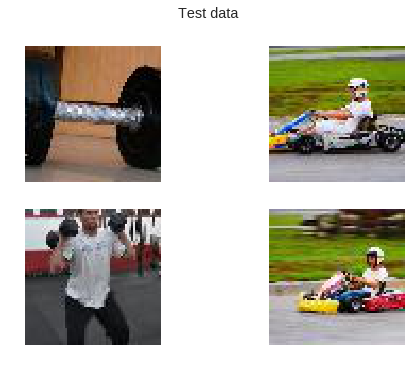

In [0]:
#Sys
import os
import numpy as np
from PIL import Image

#Custom
#from val_load import get_annotations_map

def load_images(path,num_classes):
    #Load images
    
    print('Loading ' + str(num_classes) + ' classes')

    X_train=np.zeros([num_classes*500,3,64,64],dtype='uint8')
    y_train=np.zeros([num_classes*500], dtype='uint8')

    trainPath=path+'/train'

    print('loading training images...');

    i=0
    j=0
    annotations={}
    for sChild in os.listdir(trainPath):
        sChildPath = os.path.join(os.path.join(trainPath,sChild),'images')
        annotations[sChild]=j
        for c in os.listdir(sChildPath):
            X=np.array(Image.open(os.path.join(sChildPath,c)))
            if len(np.shape(X))==2:
                X_train[i]=np.array([X,X,X])
            else:
                X_train[i]=np.transpose(X,(2,0,1))
            y_train[i]=j
            i+=1
        j+=1
        if (j >= num_classes):
            break

    print('finished loading training images')

    val_annotations_map = get_annotations_map()

    X_test = np.zeros([num_classes*50,3,64,64],dtype='uint8')
    y_test = np.zeros([num_classes*50], dtype='uint8')


    print('loading test images...')

    i = 0
    testPath=path+'/val/images'
    for sChild in os.listdir(testPath):
        if val_annotations_map[sChild] in annotations.keys():
            sChildPath = os.path.join(testPath, sChild)
            X=np.array(Image.open(sChildPath))
            if len(np.shape(X))==2:
                X_test[i]=np.array([X,X,X])
            else:
                X_test[i]=np.transpose(X,(2,0,1))
            y_test[i]=annotations[val_annotations_map[sChild]]
            i+=1
        else:
            pass


    print('finished loading test images'+str(i))

    return X_train,y_train,X_test,y_test

if __name__ == "__main__":
    import matplotlib.pyplot as plt

    path='./tiny-imagenet-200'
    X_train,y_train,X_test,y_test=load_images(path,2)
    

    fig1 = plt.figure()
    fig1.suptitle('Train data')
    ax1 = fig1.add_subplot(221)
    ax1.axis("off")
    ax1.imshow(np.transpose(X_train[0],(1,2,0)))
    print(y_train[0])
    ax2 = fig1.add_subplot(222)
    ax2.axis("off")
    ax2.imshow(np.transpose(X_train[499],(1,2,0)))
    print(y_train[499])
    ax3 = fig1.add_subplot(223)
    ax3.axis("off")
    ax3.imshow(np.transpose(X_train[500],(1,2,0)))
    print(y_train[500])
    ax4 = fig1.add_subplot(224)
    ax4.axis("off")
    ax4.imshow(np.transpose(X_train[999],(1,2,0)))
    print(y_train[999])

    plt.show()

    fig2 = plt.figure()
    fig2.suptitle('Test data')
    ax1 = fig2.add_subplot(221)
    ax1.axis("off")
    ax1.imshow(np.transpose(X_test[0],(1,2,0)))
    print(y_test[0])
    ax2 = fig2.add_subplot(222)
    ax2.axis("off")
    ax2.imshow(np.transpose(X_test[49],(1,2,0)))
    print(y_test[49])
    ax3 = fig2.add_subplot(223)
    ax3.axis("off")
    ax3.imshow(np.transpose(X_test[50],(1,2,0)))
    print(y_test[50])
    ax4 = fig2.add_subplot(224)
    ax4.axis("off")
    ax4.imshow(np.transpose(X_test[99],(1,2,0)))
    print(y_test[99])
    
    plt.show()

In [0]:
X_train,y_train,X_test,y_test = load_images(path,200)

Loading 200 classes
loading training images...
finished loading training images
loading test images...
finished loading test images10000


In [0]:
X_train.shape

(100000, 3, 64, 64)

In [0]:
X_train = X_train.reshape(X_train.shape[0], 64, 64,3)
X_test = X_test.reshape(X_test.shape[0], 64,64,3)

In [0]:
# y_train[:100]

In [0]:
Y_train = np_utils.to_categorical(y_train, 200)
Y_test = np_utils.to_categorical(y_test, 200)


In [0]:
# Y_test[:2]


# *Label Smoothing*

In [0]:
import numpy as np

def smooth_labels(y, smooth_factor):
    '''Convert a matrix of one-hot row-vector labels into smoothed versions.

    # Arguments
        y: matrix of one-hot row-vector labels to be smoothed
        smooth_factor: label smoothing factor (between 0 and 1)

    # Returns
        A matrix of smoothed labels.
    '''
    assert len(y.shape) == 2
    if 0 <= smooth_factor <= 1:
        # label smoothing ref: https://www.robots.ox.ac.uk/~vgg/rg/papers/reinception.pdf
        y *= 1 - smooth_factor
        y += smooth_factor / y.shape[1]
    else:
        raise Exception(
            'Invalid label smoothing factor: ' + str(smooth_factor))
    return y

In [0]:

# Y_train = smooth_labels(Y_train,0.5)
# Y_test = smooth_labels(Y_test,0.5)
# Y_test[:2]

#* Image augmentation*

In [0]:
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator

In [0]:
val_data = pd.read_csv('./tiny-imagenet-200/val/val_annotations.txt', sep='\t', header=None, names=['File', 'Class', 'X', 'Y', 'H', 'W'])
val_data.drop(['X', 'Y', 'H', 'W'], axis=1, inplace=True)
val_data.head(3)

,File,Class
0,val_0.JPEG,n03444034
1,val_1.JPEG,n04067472
2,val_2.JPEG,n04070727


In [0]:
def random_crop(img, random_crop_size):
    # Note: image_data_format is 'channel_last'
    assert img.shape[2] == 3
    height, width = img.shape[0], img.shape[1]
    dy, dx = random_crop_size
    x = np.random.randint(0, width - dx + 1)
    y = np.random.randint(0, height - dy + 1)
    return img[y:(y+dy), x:(x+dx), :]


def crop_generator(batches, crop_length):
    """Take as input a Keras ImageGen (Iterator) and generate random
    crops from the image batches generated by the original iterator.
    """
    while True:
        batch_x, batch_y = next(batches)
        batch_crops = np.zeros((batch_x.shape[0], crop_length, crop_length, 3))
        for i in range(batch_x.shape[0]):
            batch_crops[i] = random_crop(batch_x[i], (crop_length, crop_length))
        yield (batch_crops, batch_y)
        
# train_datagen = ImageDataGenerator(......)
# train_batches = train_datagen.flow_from_directory(DATASET_PATH + '/train',
#                                                   target_size=(256,256),
#                                                   ......)
# train_crops = crop_generator(train_batches, 224)
# ......
# net_final.fit_generator(train_crops, ......)

In [0]:


from skimage.util import random_noise

## Applying Salt and Pepper noise in images.

def apply_noise(batches):
  
  while True:
    batch_x, batch_y = next(batches)
    batch_noise = np.zeros((batch_x.shape[0], batch_x.shape[1], batch_x.shape[2], batch_x.shape[3])) 
    
    for i in range(batch_x.shape[0]):
        image_array = np.asarray(batch_x[i])
        batch_noise[i] = random_noise(image_array , mode='gaussian', var =0.01)
    yield (batch_noise, batch_y)
    
# train_generator = apply_noise(train_generator)

In [0]:
import random

def noising(image):
    array = np.array(image)
    i = random.choice(range(16,48)) # x coordinate for the top left corner of the mask
    j = random.choice(range(16,48)) # y coordinate for the top left corner of the mask
    array[i:i+16, j:j+16]=-1.0 # setting the pixels in the masked region to -1
    return array
def noise_generator(batches):
    """Take as input a Keras ImageGen (Iterator) and generate random
    crops from the image batches generated by the original iterator.
    """
    while True:
        batch_x, batch_y = next(batches)
        batch_noise = np.zeros((batch_x.shape[0], 64, 64, 3))
        for i in range(batch_x.shape[0]):
            batch_noise[i] = noising(batch_x[i])
        yield (batch_noise, batch_y)

In [0]:
from imgaug import augmenters as iaa


def apply_drop(batches):
  
  while True:
    batch_x, batch_y = next(batches)
    batch_drop = np.zeros((batch_x.shape[0], batch_x.shape[1], batch_x.shape[2], batch_x.shape[3])) 
    
    for i in range(batch_x.shape[0]):
        image_array = np.asarray(batch_x[i])
        drop = iaa.CoarseDropout((0.0, 0.5), size_percent=(0.2, 0.5))
        batch_drop[i] = drop.augment_image(image_array)
    yield (batch_drop, batch_y)

In [0]:
def blur_crop_flip_image(batches, blur_value, crop_value, flip_value):
  seq = iaa.Sequential([
    iaa.GaussianBlur(sigma=(0, blur_value)), # ex: 0.4
    iaa.Crop(percent=(0, crop_value)), # ex: 0.2
    iaa.Sometimes(0.3, iaa.Fliplr(flip_value))]) # 50% flip / horizontal flip of only 30% of the images passed
  while True:
    batch_x, batch_y = next(batches)
    batch_augmented = np.zeros((batch_x.shape[0], batch_x.shape[1], batch_x.shape[2], NUM_CHANNELS)) 
    # NOTE: imgaug works on color images (3 channels). doesn't work on greyscale images with one channel
    batch_augmented = seq.augment_images(batch_x) # calling ImgAug's augmentation on a batch of images
    yield (batch_augmented, batch_y)

In [0]:


def drop_ch(batches):
  
  while True:
    batch_x, batch_y = next(batches)
    batch_drop = np.zeros((batch_x.shape[0], batch_x.shape[1], batch_x.shape[2], batch_x.shape[3])) 
    
    for i in range(batch_x.shape[0]):
        image_array = np.asarray(batch_x[i])
        drop =iaa.CoarseDropout(0.02, size_percent=0.5, per_channel=0.5)
        batch_drop[i] = drop.augment_image(image_array)
    yield (batch_drop, batch_y)

In [0]:
# Use Augmentaion parameters as required.
import numpy as np
train_datagen = ImageDataGenerator(
    rescale= 1./255,
    #featurewise_center=True,
    #featurewise_std_normalization=True,
    zoom_range = 0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rotation_range=25,
    horizontal_flip=True
    )

train_datagen_z = ImageDataGenerator(
    rescale= 1./255,
    featurewise_center=True,
    #featurewise_std_normalization=True,
    zoom_range = (2,2),
    width_shift_range=0.2,
    height_shift_range=0.2,
    rotation_range=40,
    horizontal_flip=True
    )

# train_datagen_n = ImageDataGenerator(
#     rescale= 1./255
#     )

# datagen = ImageDataGenerator(
    
#     featurewise_center=True,
#     featurewise_std_normalization=True,
#     zoom_range = 0.3,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     rotation_range=40,
#     horizontal_flip=True
#     )


valid_datagen = ImageDataGenerator(rescale=1./255)



In [0]:
                
train_generator_64z = train_datagen_z.flow_from_directory( r'./tiny-imagenet-200/train/', target_size=(64, 64), color_mode='rgb', 
                                                         batch_size=500, class_mode='categorical', shuffle=True, seed=42)

train_generator_64 = train_datagen.flow_from_directory( r'./tiny-imagenet-200/train/', target_size=(64, 64), color_mode='rgb', 
                                                        batch_size=500, class_mode='categorical', shuffle=True, seed=42) 
                                       

Found 100000 images belonging to 200 classes.
Found 100000 images belonging to 200 classes.


In [0]:
tr_g = blur_crop_flip_image(train_generator_64, 0.4, 0.4, 40)
tr = (apply_noise(train_generator_64))
tr_cn = crop_generator(tr,44)
tr_cn_1 = crop_generator(apply_noise(tr),40)
tr_cn1 = crop_generator(tr,32)
tr_m = noise_generator(train_generator_64)
tr_d = apply_drop(train_generator_64)
# tr_do = do(train_generator_64)
tr_e = apply_drop(crop_generator(apply_noise(tr),32))

tr_m1 = apply_drop(tr_m)
tr_d1 = apply_drop(tr_d)
tr_cn11 = apply_drop(tr_cn1)



In [0]:
from itertools import chain

tr_ch = chain(tr,tr_cn)
tr_ch1 = chain(tr_ch ,train_generator_64z,tr_cn,tr_cn_1,tr_cn1)

tr_ch2 = chain(tr,tr_cn,tr_m)


tr_ch3 = chain(tr,tr_cn1,tr_m,tr_d)


tr_ch3_1 = chain(tr_m,tr_d,tr_cn1)
tr_ch3_1g = chain(tr_m,tr_d,tr_cn1,tr_g)

tr_ch3_11 = chain(tr_m,tr_d,tr_cn11)
tr_ch3_12 = chain(tr_m,tr_m1,tr_d,tr_cn1,tr_cn11)
tr_d_ch = apply_drop(tr_ch3_1)

tr_me = chain(tr_m,tr_e)
tr = chain(tr_ch3_12,tr_ch,tr_ch1,tr_ch2,tr_ch3,tr_ch3_11)




In [0]:
                                                      
validation_generator_64 = valid_datagen.flow_from_dataframe(val_data, directory='./tiny-imagenet-200/val/images/', x_col='File', y_col='Class', target_size=(64,64),
                                                    color_mode='rgb', class_mode='categorical', batch_size=500, shuffle=True, seed=42)      

Found 10000 images belonging to 200 classes.


Modelling - ***resnet***

In [0]:
from __future__ import division

import six
import keras
from keras.models import Model
from keras.layers import Convolution2D,SeparableConv2D
from keras.layers import (
    Input,
    Activation,
    Dense,
    Flatten
)
from keras.layers.convolutional import (
    Conv2D,
    MaxPooling2D,
    AveragePooling2D
)
from keras.layers.merge import add,concatenate
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l2
from keras import backend as K

def _bn_relu(input):
    """Helper to build a BN -> relu block
    """
    norm = BatchNormalization(axis=CHANNEL_AXIS)(input)
    return Activation("relu")(norm)
  
def _conv_bn_relu(**conv_params):
    """Helper to build a conv -> BN -> relu block
    """
    filters = conv_params["filters"]
    kernel_size = conv_params["kernel_size"]
    strides = conv_params.setdefault("strides", (1, 1))
    kernel_initializer = conv_params.setdefault("kernel_initializer", "he_normal")
    padding = conv_params.setdefault("padding", "same")
    kernel_regularizer = conv_params.setdefault("kernel_regularizer", l2(1.e-4))
    
    def f(input):
        conv = SeparableConv2D(filters=filters, kernel_size=kernel_size, strides=strides, padding=padding,
                               data_format=None, dilation_rate=(1, 1), depth_multiplier=1, 
                               activation=None, use_bias=True, depthwise_initializer=kernel_initializer,
                               pointwise_initializer=kernel_initializer, bias_initializer='zeros',
                               depthwise_regularizer=kernel_regularizer, pointwise_regularizer=kernel_regularizer, bias_regularizer=None, activity_regularizer=None, 
                               depthwise_constraint=None, pointwise_constraint=None, bias_constraint=None)(input)
        
#         Conv2D(filters=filters, kernel_size=kernel_size,
#                       strides=strides, padding=padding,
#                       kernel_initializer=kernel_initializer,
#                       kernel_regularizer=kernel_regularizer)(input)
        return _bn_relu(conv)

    return f  

def _bn_relu_conv(**conv_params):
    """Helper to build a BN -> relu -> conv block.
    This is an improved scheme proposed in http://arxiv.org/pdf/1603.05027v2.pdf
    """
    filters = conv_params["filters"]
    kernel_size = conv_params["kernel_size"]
    strides = conv_params.setdefault("strides", (1, 1))
    kernel_initializer = conv_params.setdefault("kernel_initializer", "he_normal")
    padding = conv_params.setdefault("padding", "same")
    kernel_regularizer = conv_params.setdefault("kernel_regularizer", l2(1.e-4))

    def f(input):
        activation = _bn_relu(input)
        return SeparableConv2D(filters=filters, kernel_size=kernel_size, strides=strides, padding=padding,
                               data_format=None, dilation_rate=(1, 1), depth_multiplier=1, 
                               activation=None, use_bias=True, depthwise_initializer=kernel_initializer,
                               pointwise_initializer=kernel_initializer, bias_initializer='zeros',
                               depthwise_regularizer=kernel_regularizer, pointwise_regularizer=kernel_regularizer,
                               bias_regularizer=None, activity_regularizer=None, 
                               depthwise_constraint=None, pointwise_constraint=None,
                               bias_constraint=None)(activation)
        
#       Conv2D(filters=filters, kernel_size=kernel_size,
#                       strides=strides, padding=padding,
#                       kernel_initializer=kernel_initializer,
#                       kernel_regularizer=kernel_regularizer)(activation)

    return f

def _shortcut(input, residual):
    """Adds a shortcut between input and residual block and merges them with "sum"
    """
    # Expand channels of shortcut to match residual.
    # Stride appropriately to match residual (width, height)
    # Should be int if network architecture is correctly configured.
    input_shape = K.int_shape(input)
    residual_shape = K.int_shape(residual)
    stride_width = int(round(input_shape[ROW_AXIS] / residual_shape[ROW_AXIS]))
    stride_height = int(round(input_shape[COL_AXIS] / residual_shape[COL_AXIS]))
    equal_channels = input_shape[CHANNEL_AXIS] == residual_shape[CHANNEL_AXIS]

    shortcut = input
    # 1 X 1 conv if shape is different. Else identity.
    if stride_width > 1 or stride_height > 1 or not equal_channels:
        shortcut = Conv2D(filters=residual_shape[CHANNEL_AXIS],
                          kernel_size=(1, 1),
                          strides=(stride_width, stride_height),
                          padding="valid",
                          kernel_initializer="he_normal",
                          kernel_regularizer=l2(0.0001))(input)

#     return concatenate([shortcut, residual])

    return add([shortcut, residual])
  
def _residual_block(block_function, filters, repetitions, is_first_layer=False):
    """Builds a residual block with repeating bottleneck blocks.
    """
    def f(input):
        for i in range(repetitions):
            init_strides = (1, 1)
            if i == 0 and not is_first_layer:
                init_strides = (2, 2)
            input = block_function(filters=filters, init_strides=init_strides,
                                   is_first_block_of_first_layer=(is_first_layer and i == 0))(input)
        return input

    return f

  
def basic_block(filters, init_strides=(1, 1), is_first_block_of_first_layer=False):
    """Basic 3 X 3 convolution blocks for use on resnets with layers <= 34.
    Follows improved proposed scheme in http://arxiv.org/pdf/1603.05027v2.pdf
    """
    def f(input):

        if is_first_block_of_first_layer:
            # don't repeat bn->relu since we just did bn->relu->maxpool
            conv1 = SeparableConv2D(filters=filters, kernel_size=(3, 3), strides=init_strides, padding="same",
                                    data_format=None, dilation_rate=(1, 1), depth_multiplier=1, 
                                    activation=None, use_bias=True, depthwise_initializer="he_normal",
                                    pointwise_initializer="he_normal", bias_initializer='zeros',
                                    depthwise_regularizer=l2(1e-4), pointwise_regularizer=l2(1e-4),
                                    bias_regularizer=None, activity_regularizer=None, 
                                    depthwise_constraint=None, pointwise_constraint=None,
                                    bias_constraint=None)(input)
#             Conv2D(filters=filters, kernel_size=(3, 3),
#                            strides=init_strides,
#                            padding="same",
#                            kernel_initializer="he_normal",
#                            kernel_regularizer=l2(1e-4))(input)
        else:
            conv1 = _bn_relu_conv(filters=filters, kernel_size=(3, 3),
                                  strides=init_strides)(input)

        residual = _bn_relu_conv(filters=filters, kernel_size=(3, 3))(conv1)
#         residual = keras.layers.GaussianNoise(.5)(residual)
        return _shortcut(input, residual)

    return f

  
def bottleneck(filters, init_strides=(1, 1), is_first_block_of_first_layer=False):
    """Bottleneck architecture for > 34 layer resnet.
    Follows improved proposed scheme in http://arxiv.org/pdf/1603.05027v2.pdf
    Returns:
        A final conv layer of filters * 4
    """
    def f(input):

        if is_first_block_of_first_layer:
            # don't repeat bn->relu since we just did bn->relu->maxpool
            conv_1_1 = Conv2D(filters=filters, kernel_size=(1, 1),
                              strides=init_strides,
                              padding="same",
                              kernel_initializer="he_normal",
                              kernel_regularizer=l2(1e-4))(input)
        else:
            conv_1_1 = _bn_relu_conv(filters=filters, kernel_size=(1, 1),
                                     strides=init_strides)(input)

        conv_3_3 = _bn_relu_conv(filters=filters, kernel_size=(3, 3))(conv_1_1)
        residual = _bn_relu_conv(filters=filters *4, kernel_size=(1, 1))(conv_3_3)
        return _shortcut(input, residual)

    return f
  
def _handle_dim_ordering():
    global ROW_AXIS
    global COL_AXIS
    global CHANNEL_AXIS
    if K.image_dim_ordering() == 'tf':
        ROW_AXIS = 1
        COL_AXIS = 2
        CHANNEL_AXIS = 3
    else:
        CHANNEL_AXIS = 1
        ROW_AXIS = 2
        COL_AXIS = 3


def _get_block(identifier):
    if isinstance(identifier, six.string_types):
        res = globals().get(identifier)
        if not res:
            raise ValueError('Invalid {}'.format(identifier))
        return res
    return identifier

class ResnetBuilder(object):
    @staticmethod
    def build(input_shape, num_outputs, block_fn, repetitions):
     
        _handle_dim_ordering()
        if len(input_shape) != 3:
            raise Exception("Input shape should be a tuple (nb_channels, nb_rows, nb_cols)")

        # Permute dimension order if necessary
        if K.image_dim_ordering() == 'tf':
            input_shape = (input_shape[0], input_shape[1], input_shape[2])

        # Load function from str if needed.
        block_fn = _get_block(block_fn)

        input = Input(shape=input_shape)

        conv1 = _conv_bn_relu(filters=64, kernel_size=(7, 7), strides=(2, 2))(input)

#         conv1 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(conv1)

        

        block = conv1 #pool1
        filters = 64
        for i, r in enumerate(repetitions):
            block = _residual_block(block_fn, filters=filters, repetitions=r, is_first_layer=(i == 0))(block)

              
            filters *= 2

        # Last activation
        block = _bn_relu(block)

       # Classifier block
        block_shape = K.int_shape(block)
        pool2 = AveragePooling2D(pool_size=(block_shape[ROW_AXIS], block_shape[COL_AXIS]),
                                 strides=(1, 1))(block)

        conv2 =(Convolution2D(num_outputs,(1, 1)))(pool2)
        
        op = conv2
        flatten1 = Flatten()(op)#(activation="softmax")

        activation = Activation("softmax")(flatten1)
        
        model = Model(inputs=input, outputs=activation)
   
        return model


    @staticmethod
    def build_resnet_50(input_shape, num_outputs):
        return ResnetBuilder.build(input_shape, num_outputs, bottleneck, [3, 4, 6, 3])
      
    @staticmethod
    def build_resnet_18(input_shape, num_outputs):
        return ResnetBuilder.build(input_shape, num_outputs, basic_block, [2, 2, 2,2 ])
      
    @staticmethod
    def build_resnet_34(input_shape, num_outputs):
        return ResnetBuilder.build(input_shape, num_outputs, basic_block, [3, 4, 6, 3])

***Cyclic Learning***

In [0]:
import matplotlib.pyplot as plt
import keras.backend as K
from keras.callbacks import Callback


class LRFinder(Callback):
    
    '''
    A simple callback for finding the optimal learning rate range for your model + dataset. 
    
    # Usage
        ```python
            lr_finder = LRFinder(min_lr=1e-5, 
                                 max_lr=1e-2, 
                                 steps_per_epoch=np.ceil(epoch_size/batch_size), 
                                 epochs=3)
            model.fit(X_train, Y_train, callbacks=[lr_finder])
            
            lr_finder.plot_loss()
        ```
    
    # Arguments
        min_lr: The lower bound of the learning rate range for the experiment.
        max_lr: The upper bound of the learning rate range for the experiment.
        steps_per_epoch: Number of mini-batches in the dataset. Calculated as `np.ceil(epoch_size/batch_size)`. 
        epochs: Number of epochs to run experiment. Usually between 2 and 4 epochs is sufficient. 
        
    # References
        Blog post: jeremyjordan.me/nn-learning-rate
        Original paper: https://arxiv.org/abs/1506.01186
    '''
    
    def __init__(self, min_lr=1e-5, max_lr=1e-2, steps_per_epoch=None, epochs=None):
        super().__init__()
        
        self.min_lr = min_lr
        self.max_lr = max_lr
        self.total_iterations = steps_per_epoch * epochs
        self.iteration = 0
        self.history = {}
        
    def clr(self):
        '''Calculate the learning rate.'''
        x = self.iteration / self.total_iterations 
        return self.min_lr + (self.max_lr-self.min_lr) * x
        
    def on_train_begin(self, logs=None):
        '''Initialize the learning rate to the minimum value at the start of training.'''
        logs = logs or {}
        K.set_value(self.model.optimizer.lr, self.min_lr)
        
    def on_batch_end(self, epoch, logs=None):
        '''Record previous batch statistics and update the learning rate.'''
        logs = logs or {}
        self.iteration += 1

        self.history.setdefault('lr', []).append(K.get_value(self.model.optimizer.lr))
        self.history.setdefault('iterations', []).append(self.iteration)

        for k, v in logs.items():
            self.history.setdefault(k, []).append(v)
            
        K.set_value(self.model.optimizer.lr, self.clr())
 
    def plot_lr(self):
        '''Helper function to quickly inspect the learning rate schedule.'''
        plt.plot(self.history['iterations'], self.history['lr'])
        plt.yscale('log')
        plt.xlabel('Iteration')
        plt.ylabel('Learning rate')
        plt.show()
        
    def plot_loss(self):
        '''Helper function to quickly observe the learning rate experiment results.'''
        plt.plot(self.history['lr'], self.history['loss'])
        plt.xscale('log')
        plt.xlabel('Learning rate')
        plt.ylabel('Loss')
        plt.show()

In [0]:
from keras.callbacks import Callback
import keras.backend as K
import numpy as np

class SGDRScheduler(Callback):
    '''Cosine annealing learning rate scheduler with periodic restarts.
    # Usage
        ```python
            schedule = SGDRScheduler(min_lr=1e-5,
                                     max_lr=1e-2,
                                     steps_per_epoch=np.ceil(epoch_size/batch_size),
                                     lr_decay=0.9,
                                     cycle_length=5,
                                     mult_factor=1.5)
            model.fit(X_train, Y_train, epochs=100, callbacks=[schedule])
        ```
    # Arguments
        min_lr: The lower bound of the learning rate range for the experiment.
        max_lr: The upper bound of the learning rate range for the experiment.
        steps_per_epoch: Number of mini-batches in the dataset. Calculated as `np.ceil(epoch_size/batch_size)`. 
        lr_decay: Reduce the max_lr after the completion of each cycle.
                  Ex. To reduce the max_lr by 20% after each cycle, set this value to 0.8.
        cycle_length: Initial number of epochs in a cycle.
        mult_factor: Scale epochs_to_restart after each full cycle completion.
    # References
        Blog post: jeremyjordan.me/nn-learning-rate
        Original paper: http://arxiv.org/abs/1608.03983
    '''
    def __init__(self,
                 min_lr,
                 max_lr,
                 steps_per_epoch,
                 lr_decay=1,
                 cycle_length=10,
                 mult_factor=2):

        self.min_lr = min_lr
        self.max_lr = max_lr
        self.lr_decay = lr_decay

        self.batch_since_restart = 0
        self.next_restart = cycle_length

        self.steps_per_epoch = steps_per_epoch

        self.cycle_length = cycle_length
        self.mult_factor = mult_factor

        self.history = {}

    def clr(self):
        '''Calculate the learning rate.'''
        fraction_to_restart = self.batch_since_restart / (self.steps_per_epoch * self.cycle_length)
        lr = self.min_lr + 0.5 * (self.max_lr - self.min_lr) * (1 + np.cos(fraction_to_restart * np.pi))
        return lr

    def on_train_begin(self, logs={}):
        '''Initialize the learning rate to the minimum value at the start of training.'''
        logs = logs or {}
        K.set_value(self.model.optimizer.lr, self.max_lr)

    def on_batch_end(self, batch, logs={}):
        '''Record previous batch statistics and update the learning rate.'''
        logs = logs or {}
        self.history.setdefault('lr', []).append(K.get_value(self.model.optimizer.lr))
        for k, v in logs.items():
            self.history.setdefault(k, []).append(v)

        self.batch_since_restart += 1
        K.set_value(self.model.optimizer.lr, self.clr())

    def on_epoch_end(self, epoch, logs={}):
        '''Check for end of current cycle, apply restarts when necessary.'''
        if epoch + 1 == self.next_restart:
            self.batch_since_restart = 0
            self.cycle_length = np.ceil(self.cycle_length * self.mult_factor)
            self.next_restart += self.cycle_length
            self.max_lr *= self.lr_decay
            self.best_weights = self.model.get_weights()

    def on_train_end(self, logs={}):
        '''Set weights to the values from the end of the most recent cycle for best performance.'''
        self.model.set_weights(self.best_weights)

In [0]:

from __future__ import print_function
#from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
from keras.callbacks import ReduceLROnPlateau, CSVLogger, EarlyStopping, ModelCheckpoint

import numpy as np
#import resnet


lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1), cooldown=0, patience=5, min_lr=0.5e-6)
early_stopper = EarlyStopping(min_delta=0.001, patience=10)
# csv_logger = CSVLogger('resnet50_imgnet.csv')


In [0]:
# model.summary()
# # from keras.utils.vis_utils import plot_model
# # plot_model(model, to_file='/content/gdrive/My Drive/MyCNN/25_ld.png', show_shapes=True, show_layer_names=True)



---

***64 x 64***

In [0]:
# from keras import optimizers
# sgd = optimizers.SGD( lr=0.01, decay=1e-6, momentum=0.9,nesterov=True) #


# lr_finder = LRFinder(min_lr=1e-5, 
#                      max_lr=1e2, 
#                      steps_per_epoch=np.ceil(200), 
#                      epochs=3)

# model = ResnetBuilder.build_resnet_34((64,64,3),200)

# model.compile(loss='categorical_crossentropy',
#               optimizer=sgd,#'adam',#'sgd',#'Adam(0.1)',
#               metrics=['accuracy'])

# model.fit_generator(tr_ch, epochs=4, steps_per_epoch=200, validation_steps=200,
#                     callbacks=[lr_finder],
#                     shuffle=True,
#                     validation_data=validation_generator_64)
            
# lr_finder.plot_loss()

In [0]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
separable_conv2d_1 (SeparableCo (None, 32, 32, 64)   403         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 32, 32, 64)   256         separable_conv2d_1[0][0]         
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 32, 32, 64)   0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
separable_

In [0]:
schedule = SGDRScheduler(min_lr=1e-2,
                         max_lr=1e-1,
                         steps_per_epoch=np.ceil(200),
                         lr_decay=0.9,
                         cycle_length=5,
                         mult_factor=1.5)

In [0]:
filepath="/content/gdrive/My Drive/MyCNN/64/epochs:{epoch:03d}-val_acc:{val_acc:.3f}.hdf5"

from keras import optimizers
sgd = optimizers.SGD( lr=0.01, decay=1e-6, momentum=0.9,nesterov=True) #

checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')


model = ResnetBuilder.build_resnet_34((64,64,3),200)

# model.load_weights('/content/gdrive/My Drive/MyCNN/32/epochs:028-val_acc:0.181.hdf5')

model.compile(loss='categorical_crossentropy',
              optimizer=sgd,#'Adam(0.1)',
              metrics=['accuracy'])


model.fit_generator(tr_ch, epochs=60, steps_per_epoch=200, validation_steps=200,
                    callbacks=[checkpoint,schedule],
                    shuffle=True,
                    validation_data=validation_generator_64)



Epoch 1/60
200/200 [==============================] - 446s 2s/step - loss: 6.5095 - acc: 0.0435 - val_loss: 6.5633 - val_acc: 0.0353

Epoch 00001: val_acc improved from -inf to 0.03529, saving model to /content/gdrive/My Drive/MyCNN/64/epochs:001-val_acc:0.035.hdf5
Epoch 2/60
200/200 [==============================] - 422s 2s/step - loss: 5.9519 - acc: 0.0889 - val_loss: 6.3048 - val_acc: 0.0643

Epoch 00002: val_acc improved from 0.03529 to 0.06428, saving model to /content/gdrive/My Drive/MyCNN/64/epochs:002-val_acc:0.064.hdf5
Epoch 3/60
200/200 [==============================] - 422s 2s/step - loss: 5.5956 - acc: 0.1244 - val_loss: 5.6973 - val_acc: 0.1094

Epoch 00003: val_acc improved from 0.06428 to 0.10939, saving model to /content/gdrive/My Drive/MyCNN/64/epochs:003-val_acc:0.109.hdf5
Epoch 4/60
200/200 [==============================] - 423s 2s/step - loss: 5.3610 - acc: 0.1546 - val_loss: 5.3031 - val_acc: 0.1531

Epoch 00004: val_acc improved from 0.10939 to 0.15309, saving 

In [0]:
filepath="/content/gdrive/My Drive/MyCNN/64/epochs:{epoch:03d}-val_acc:{val_acc:.3f}.hdf5"

from keras import optimizers
sgd = optimizers.SGD( lr=0.01, decay=1e-6, momentum=0.9,nesterov=True) #

checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')


model = ResnetBuilder.build_resnet_34((64,64,3),200)

model.load_weights('/content/gdrive/My Drive/MyCNN/64/epochs:025-val_acc:0.340.hdf5')

model.compile(loss='categorical_crossentropy',
              optimizer=sgd,#'Adam(0.1)',
              metrics=['accuracy'])


model.fit_generator(tr_ch, epochs=60, steps_per_epoch=200, validation_steps=200,
                    callbacks=[checkpoint,schedule],
                    shuffle=True,
                    validation_data=validation_generator_64)



Instructions for updating:
Use tf.cast instead.
Epoch 1/60
200/200 [==============================] - 420s 2s/step - loss: 3.5523 - acc: 0.3424 - val_loss: 5.3574 - val_acc: 0.1546

Epoch 00001: val_acc improved from -inf to 0.15460, saving model to /content/gdrive/My Drive/MyCNN/64/epochs:001-val_acc:0.155.hdf5
Epoch 2/60
200/200 [==============================] - 402s 2s/step - loss: 3.4038 - acc: 0.3662 - val_loss: 4.1271 - val_acc: 0.2632

Epoch 00002: val_acc improved from 0.15460 to 0.26320, saving model to /content/gdrive/My Drive/MyCNN/64/epochs:002-val_acc:0.263.hdf5
Epoch 3/60
200/200 [==============================] - 402s 2s/step - loss: 3.2092 - acc: 0.3986 - val_loss: 3.7411 - val_acc: 0.3162

Epoch 00003: val_acc improved from 0.26320 to 0.31620, saving model to /content/gdrive/My Drive/MyCNN/64/epochs:003-val_acc:0.316.hdf5
Epoch 4/60
200/200 [==============================] - 406s 2s/step - loss: 3.0276 - acc: 0.4340 - val_loss: 3.7175 - val_acc: 0.3337

Epoch 00004: v

In [0]:
filepath="/content/gdrive/My Drive/MyCNN/64/epochs:{epoch:03d}-val_acc:{val_acc:.3f}.hdf5"

from keras import optimizers
sgd = optimizers.SGD( lr=0.01, decay=1e-6, momentum=0.9,nesterov=True) #

checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')


model = ResnetBuilder.build_resnet_34((64,64,3),200)

model.load_weights('/content/gdrive/My Drive/MyCNN/64/epochs:024-val_acc:0.431.hdf5')

model.compile(loss='categorical_crossentropy',
              optimizer=sgd,#'Adam(0.1)',
              metrics=['accuracy'])


model.fit_generator(tr_ch2, epochs=100, steps_per_epoch=200, validation_steps=200,
                    callbacks=[checkpoint,schedule],
                    shuffle=True,
                    validation_data=validation_generator_64)


Epoch 1/100
200/200 [==============================] - 430s 2s/step - loss: 2.7677 - acc: 0.4472 - val_loss: 3.9693 - val_acc: 0.2714

Epoch 00001: val_acc improved from -inf to 0.27142, saving model to /content/gdrive/My Drive/MyCNN/64/epochs:001-val_acc:0.271.hdf5
Epoch 2/100
200/200 [==============================] - 401s 2s/step - loss: 2.6559 - acc: 0.4720 - val_loss: 3.8835 - val_acc: 0.3140

Epoch 00002: val_acc improved from 0.27142 to 0.31396, saving model to /content/gdrive/My Drive/MyCNN/64/epochs:002-val_acc:0.314.hdf5
Epoch 3/100
200/200 [==============================] - 397s 2s/step - loss: 2.4391 - acc: 0.5174 - val_loss: 3.3940 - val_acc: 0.3709

Epoch 00003: val_acc improved from 0.31396 to 0.37094, saving model to /content/gdrive/My Drive/MyCNN/64/epochs:003-val_acc:0.371.hdf5
Epoch 4/100
200/200 [==============================] - 399s 2s/step - loss: 2.2189 - acc: 0.5676 - val_loss: 3.0810 - val_acc: 0.4236

Epoch 00004: val_acc improved from 0.37094 to 0.42363, sav

KeyboardInterrupt: ignored

In [0]:
filepath="/content/gdrive/My Drive/MyCNN/64/epochs:{epoch:03d}-val_acc:{val_acc:.3f}.hdf5"

from keras import optimizers
sgd = optimizers.SGD( lr=0.01, decay=1e-6, momentum=0.9,nesterov=True) #

checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

schedule = SGDRScheduler(min_lr=1e-2,
                         max_lr=1e-1,
                         steps_per_epoch=np.ceil(200),
                         lr_decay=0.9,
                         cycle_length=4,
                         mult_factor=1.5)


model = ResnetBuilder.build_resnet_34((64,64,3),200)

model.load_weights('/content/gdrive/My Drive/MyCNN/64/epochs:042-val_acc:0.443.hdf5')


model.compile(loss='categorical_crossentropy',
              optimizer=sgd,#'Adam(0.1)',
              metrics=['accuracy'])


model.fit_generator(tr_ch3, epochs=30, steps_per_epoch=200, validation_steps=200,
                    callbacks=[checkpoint,schedule],
                    shuffle=True,
                    validation_data=validation_generator_64)

Instructions for updating:
Use tf.cast instead.
Epoch 1/30
200/200 [==============================] - 397s 2s/step - loss: 2.5103 - acc: 0.5104 - val_loss: 4.6878 - val_acc: 0.2374

Epoch 00001: val_acc improved from -inf to 0.23740, saving model to /content/gdrive/My Drive/MyCNN/64/epochs:001-val_acc:0.237.hdf5
Epoch 2/30
200/200 [==============================] - 367s 2s/step - loss: 2.1129 - acc: 0.5966 - val_loss: 3.8267 - val_acc: 0.3656

Epoch 00002: val_acc improved from 0.23740 to 0.36560, saving model to /content/gdrive/My Drive/MyCNN/64/epochs:002-val_acc:0.366.hdf5
Epoch 3/30
200/200 [==============================] - 366s 2s/step - loss: 1.7089 - acc: 0.6979 - val_loss: 3.5248 - val_acc: 0.4191

Epoch 00003: val_acc improved from 0.36560 to 0.41910, saving model to /content/gdrive/My Drive/MyCNN/64/epochs:003-val_acc:0.419.hdf5
Epoch 4/30
200/200 [==============================] - 365s 2s/step - loss: 1.3754 - acc: 0.7901 - val_loss: 3.4161 - val_acc: 0.4499

Epoch 00004: v

In [0]:
model.fit_generator(tr_ch3, epochs=5, steps_per_epoch=200, validation_steps=200,
                    callbacks=[checkpoint,schedule],
                    shuffle=True,
                    validation_data=validation_generator_64)

Epoch 1/5
200/200 [==============================] - 395s 2s/step - loss: 1.0625 - acc: 0.8839 - val_loss: 3.9382 - val_acc: 0.4307

Epoch 00001: val_acc did not improve from 0.44990
Epoch 2/5
200/200 [==============================] - 368s 2s/step - loss: 1.0142 - acc: 0.8969 - val_loss: 3.9218 - val_acc: 0.4327

Epoch 00002: val_acc did not improve from 0.44990
Epoch 3/5
200/200 [==============================] - 357s 2s/step - loss: 0.9698 - acc: 0.9097 - val_loss: 3.9487 - val_acc: 0.4344

Epoch 00003: val_acc did not improve from 0.44990
Epoch 4/5
200/200 [==============================] - 355s 2s/step - loss: 0.9545 - acc: 0.9115 - val_loss: 3.9593 - val_acc: 0.4340

Epoch 00004: val_acc did not improve from 0.44990
Epoch 5/5
200/200 [==============================] - 373s 2s/step - loss: 0.9481 - acc: 0.9120 - val_loss: 4.1211 - val_acc: 0.4279

Epoch 00005: val_acc did not improve from 0.44990


In [0]:
model.fit_generator(tr_ch3_1, epochs=30, steps_per_epoch=200, validation_steps=200,
                    callbacks=[checkpoint,schedule],
                    shuffle=True,
                    validation_data=validation_generator_64)

Epoch 1/30
200/200 [==============================] - 338s 2s/step - loss: 1.5519 - acc: 0.7481 - val_loss: 3.9773 - val_acc: 0.4250

Epoch 00001: val_acc did not improve from 0.44990
Epoch 2/30
200/200 [==============================] - 323s 2s/step - loss: 1.4068 - acc: 0.7799 - val_loss: 4.4127 - val_acc: 0.3692

Epoch 00002: val_acc did not improve from 0.44990
Epoch 3/30
199/200 [============================>.] - ETA: 1s - loss: 1.4720 - acc: 0.7613

In [0]:
filepath="/content/gdrive/My Drive/MyCNN/64/epochs:{epoch:03d}-val_acc:{val_acc:.3f}.hdf5"

from keras import optimizers
sgd = optimizers.SGD( lr=0.01, decay=1e-6, momentum=0.9,nesterov=True) #

checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

schedule = SGDRScheduler(min_lr=1e-2,
                         max_lr=1e-1,
                         steps_per_epoch=np.ceil(200),
                         lr_decay=0.9,
                         cycle_length=4,
                         mult_factor=1.5)


model = ResnetBuilder.build_resnet_34((64,64,3),200)

model.load_weights('/content/gdrive/My Drive/MyCNN/64/epochs:019-val_acc:0.465.hdf5')


model.compile(loss='categorical_crossentropy',
              optimizer=sgd,#'Adam(0.1)',
              metrics=['accuracy'])


model.fit_generator(tr_ch3_1, epochs=30, steps_per_epoch=200, validation_steps=200,
                    callbacks=[checkpoint,schedule],
                    shuffle=True,
                    validation_data=validation_generator_64)

Epoch 1/30
200/200 [==============================] - 350s 2s/step - loss: 2.1683 - acc: 0.6175 - val_loss: 5.8675 - val_acc: 0.2600

Epoch 00001: val_acc improved from -inf to 0.26000, saving model to /content/gdrive/My Drive/MyCNN/64/epochs:001-val_acc:0.260.hdf5
Epoch 2/30
200/200 [==============================] - 334s 2s/step - loss: 1.8135 - acc: 0.7058 - val_loss: 4.6373 - val_acc: 0.3646

Epoch 00002: val_acc improved from 0.26000 to 0.36460, saving model to /content/gdrive/My Drive/MyCNN/64/epochs:002-val_acc:0.365.hdf5
Epoch 3/30
200/200 [==============================] - 332s 2s/step - loss: 1.3959 - acc: 0.8236 - val_loss: 3.4875 - val_acc: 0.4889

Epoch 00003: val_acc improved from 0.36460 to 0.48890, saving model to /content/gdrive/My Drive/MyCNN/64/epochs:003-val_acc:0.489.hdf5
Epoch 4/30
200/200 [==============================] - 331s 2s/step - loss: 1.1326 - acc: 0.9004 - val_loss: 3.5564 - val_acc: 0.4946

Epoch 00004: val_acc improved from 0.48890 to 0.49460, saving 

In [0]:
model.fit_generator(tr_me, epochs=10, steps_per_epoch=200, validation_steps=200,
                    callbacks=[checkpoint,schedule],
                    shuffle=True,
                    validation_data=validation_generator_64)

Epoch 1/10
200/200 [==============================] - 347s 2s/step - loss: 0.9324 - acc: 0.9511 - val_loss: 4.0362 - val_acc: 0.4735

Epoch 00001: val_acc did not improve from 0.49460
Epoch 2/10
200/200 [==============================] - 335s 2s/step - loss: 0.9033 - acc: 0.9580 - val_loss: 3.9596 - val_acc: 0.4766

Epoch 00002: val_acc did not improve from 0.49460
Epoch 3/10
200/200 [==============================] - 334s 2s/step - loss: 0.8826 - acc: 0.9631 - val_loss: 3.9392 - val_acc: 0.4836

Epoch 00003: val_acc did not improve from 0.49460
Epoch 4/10
200/200 [==============================] - 332s 2s/step - loss: 0.8693 - acc: 0.9652 - val_loss: 4.0092 - val_acc: 0.4804

Epoch 00004: val_acc did not improve from 0.49460
Epoch 5/10
200/200 [==============================] - 330s 2s/step - loss: 0.8624 - acc: 0.9646 - val_loss: 4.0514 - val_acc: 0.4794

Epoch 00005: val_acc did not improve from 0.49460
Epoch 6/10
200/200 [==============================] - 330s 2s/step - loss: 0.861

In [0]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
separable_conv2d_133 (Separable (None, 32, 32, 64)   403         input_5[0][0]                    
__________________________________________________________________________________________________
batch_normalization_133 (BatchN (None, 32, 32, 64)   256         separable_conv2d_133[0][0]       
__________________________________________________________________________________________________
activation_137 (Activation)     (None, 32, 32, 64)   0           batch_normalization_133[0][0]    
__________________________________________________________________________________________________
separable_

In [0]:
from keras import optimizers
sgd = optimizers.SGD( lr=0.01, decay=1e-6, momentum=0.9,nesterov=True) #


model = ResnetBuilder.build_resnet_34((64,64,3),200)

model.load_weights('/content/gdrive/My Drive/MyCNN/64/epochs:004-val_acc:0.495.hdf5')

model.compile(loss='categorical_crossentropy',
              optimizer=sgd,#'Adam(0.1)',
              metrics=['accuracy'])

model.evaluate_generator(validation_generator_64,200)
# model.evaluate(X_test,Y_test)

[3.556350202560425, 0.49459999725222586]

In [0]:
scores = model.evaluate_generator(validation_generator_64,200) #1514 testing images
print("Accuracy = ", scores[1])

Accuracy =  0.4951899968087673
